# Lab 2 - Data Cleaning I
## Data tidying and handling missing values


## Table of contents:
- Data tidying
    - no special characters 
    - all lower case
- What data needs to be cleaned?
- Detecting and handle duplicates
- Detecting missing data and their frequency
- Why is the data missing?
- How to handle missing data(numerical) 
- Complete Case Analysis - CCA
- Mean/Median Imputation (Code example)
- Imputation with Arbitrary values
- Mean vs Median which one to use
- Multi-Variate Imputation
- Imputing categorical Variables
    - Mode
    - Arbitrary value
- Other interesting ways to Impute missing data
- Saving to a csv file

## Importing and loading necessary datasets

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!ls

Datasets                     survey_results_public.csv
houseprice.csv               task2_handling_missing.ipynb
lab2_Cleaning_I.ipynb


In [2]:
# modify by placing your own directory where the datasets resides
data_dir = './Datasets/'

In [3]:
# for detecting and handling missing
titanic_df = pd.read_csv(data_dir + 'titanic.csv')
# for tidying column names
happiness_df = pd.read_csv(data_dir + 'happiness_2016.csv')

In [4]:
titanic_df.info(),happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country       

(None, None)

## First things first - tyding the column names
Before we get started with cleaning data. I would first like to mention the importance of renaming the column names to make sure there is no special characters and have them all lower case.

Why? Short answer: It makes your life easier. Because it is much easier when accessing column to not have to make the first character capital and also not having spaces allows you to access the columns as if its an attribute (i.e df.column_name)

there are multiple ways to rename columns. You can use `df.rename(columns={})` and pass in the original column and new column name as key value pairs to rename a single/multiple columns.

or you can reassign all column names by reassigning `df.columns` to a list of column names.

The following function takes in a dataframe and renames the column names to make them all lower case and no spaces (replaced by `_`).

In [5]:
happiness_df.columns = happiness_df.columns.str.lower().str.replace(' ', '_')

In [ ]:
# OR
def rename_columns(df):
#     make all cols lower case
    df.columns = df.columns.str.lower()
    # Iterate through the column names and replace space with underscore,
#     using list comprehension
    df.columns = [col.replace(' ', '_') for col in df.columns]
rename_columns(happiness_df)
    
#     equivalent,not using list comprehension
#     for col in df.columns:
#         col_no_spaces = col.replace('_', ' ')
#         df.rename(columns={col:col_no_spaces})

In [6]:
happiness_df.columns

Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'lower_confidence_interval', 'upper_confidence_interval',
       'economy_(gdp_per_capita)', 'family', 'health_(life_expectancy)',
       'freedom', 'trust_(government_corruption)', 'generosity',
       'dystopia_residual'],
      dtype='object')

## Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more

Almost any dataset that you are going to be working with is going to have missing data. So learning how to deal with missing values is essential. 

## Detecting Duplicates - 
for this example we will use dummy data

### Detecting duplicates - multiple identical rows - all features the same

In [8]:
# Detect duplicate rows based on all columns

data = {'A': [1, 2, 2, 3, 4],
        'B': ['apple', 'banana', 'banana', 'cherry', 'date']}
df_dummy = pd.DataFrame(data)
# take subset of duplicates
duplicates = df_dummy[df_dummy.duplicated()]

In [12]:
df_dummy

,A,B
0,1,apple
1,2,banana
2,2,banana
3,3,cherry
4,4,date


In [13]:
duplicates

,A,B
2,2,banana


In [14]:
# get number of duplicates
df_dummy.duplicated().sum()

1

### Detecting dulicates - similar rows - one feature is repeated 
For instance two record have the same date.

The question would then be would you consider this a duplicate? You have to first decide which features you want to examine to see if there is duplicates.

You can achieve this by specifying which columns to consider for detecting duplicates using the subset parameter.

In [23]:
duplicates = df_dummy[df_dummy.duplicated(subset=['A'])]
print(duplicates)

   A       B
2  2  banana


### Dropping duplicates
the `drop_duplicates` method keeps the first occurrence of a duplicate row by default and drops all subsequent occurrences.

In [15]:
df_no_duplicates = df_dummy.drop_duplicates()
df_no_duplicates

,A,B
0,1,apple
1,2,banana
3,3,cherry
4,4,date


## Data consistency 
Data consistency refers to the quality and reliability of data, ensuring that data conforms to predefined standards or expectations. When data is consistent, it follows a set of rules or criteria that make it reliable and suitable for analysis, processing, and reporting.

This can be inferred directly from the dataset description provided and overall domain expertise. 

Moreover, you could intuitevly infer which features do not meet the standards or the expected values. Consider the titanic dataset where the age had decimal values. Data consistency in this context means that all the values in the "Age" column should be integers since age is typically represented as whole numbers.

The following example modifies the datatype of the age feature from float to integer.The `astype` method rounds down. if you wish to round up you could use the `round` method before converting to int.

In [16]:
titanic_df.Age.dtype

dtype('float64')

In [17]:
# for demonstration ,will result in an error
# because there is missing values we need to deal with first

# Convert the float column to int
titanic_df['Age'] = titanic_df['Age'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

## Detecting Missing Values 
For this example we will use the titanic dataset

In [28]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# Calculating sum of null entries and percentage of null entries
sum_null = titanic_df.isnull().sum()
perc_null_mean = titanic_df.isnull().mean()*100
print(sum_null)
print('-'*40)
perc_null_mean

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## Why is the data missing? 
There are 3 mechanisms that lead to missing data, 2 of them involve missing data randomly or almost-randomly, and the third one involves a systematic loss of data.
3 main types MCAR,MAR and MNAR 

#### Missing Completely at Random, MCAR:

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. 
When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other. If values for observations are missing completely at random, then disregarding those cases would not bias the inferences made.


#### Missing at Random, MAR: 

MAR occurs when there is a relationship between the propensity of missing values and the observed data. In other words, the probability of an observation being missing depends on available information (i.e., other variables in the dataset). For example, if men are more likely to disclose their weight than women, weight is MAR. The weight information will be missing at random for those men and women who do not disclose their weight, but as men are more prone to disclose it, there will be more missing values for women than for men.

In a situation like the above, if we decide to proceed with the variable with missing values (in this case weight), we might benefit from including gender to control the bias in weight for the missing observations.


#### Missing Not at Random, MNAR: 

Missing data is not at random (MNAR) when there is a mechanism or a reason why missing values are introduced in the dataset. For example, MNAR would occur if people failed to fill in a depression survey because of their level of depression. Here, the missing of data is related to the outcome, depression. Similarly, when a financial company asks for bank and identity documents from customers in order to prevent identity fraud, typically, fraudsters impersonating someone else will not upload documents, because they don't have them, because they are fraudsters. Therefore, there is a systematic relationship between the missing documents and the target we want to predict: fraud.

Understanding the mechanism by which data is missing is important to decide which methods to use to impute the missing values.

## Mechanisms of Missing Data

### Missing data Not At Random (MNAR): Systematic missing values

In the Titanic dataset, both the missing values of the variables **age** and **cabin**, were introduced systematically. For many of the people who did not survive, the **age** they had or the **cabin** they were traveling in, could not be established. The people who survived could be otherwise asked for that information.

Can we infer this by looking at the data?

In a situation like this, we could expect a greater number of missing values for people who did not survive.

Let's have a look.

In [30]:
titanic_df.Age.isnull().groupby(titanic_df['Survived']).mean()

Survived
0    0.227687
1    0.152047
Name: Age, dtype: float64

Again, we observe a higher number of missing data for the people who did not survive the tragedy. The analysis therefore suggests that there is a systematic loss of data: people who did not survive tend to have more missing information. Presumably, the method chosen to gather the information, contributes to the generation of these missing data.

In [31]:
titanic_df.Cabin.isnull().groupby(titanic_df['Survived']).mean()

Survived
0    0.876138
1    0.602339
Name: Cabin, dtype: float64

We observe that the percentage of missing values is higher for people who did not survive (87%), respect to people who survived (60%). This finding is aligned with our hypothesis that the data is missing because after people died, the information could not be retrieved.

**Note**: Having said this, to truly underpin whether the data is missing not at random, we would need to get extremely familiar with the way data was collected. Analysing datasets, can only point us in the right direction or help us build assumptions.

### Missing data Completely At Random (MCAR)

In [10]:
# In the titanic dataset, there are also missing values
# for the variable Embarked.
# Let's have a look.

# Let's slice the dataframe to show only the observations
# with missing values for Embarked

data[data['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_null,age_null
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,0,0
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH",0,0


These 2 women were traveling together, Miss Icard was the maid of Mrs Stone.

A priori, there does not seem to be an indication that the missing information in the variable Embarked is depending on any other variable, and the fact that these women survived, means that they could have been asked for this information.

Very likely the values were lost at the time of building the dataset.

If these values are MCAR, the probability of data being missing for these 2 women is the same as the probability for values to missing for any other person on the titanic. Of course this will be hard, if possible at all, to prove. But I hope this serves as a demonstration.

## How to deal with the missing data

### CCA - Complete Case Analysis
- When to use
- Examples

## Complete Case Analysis


Complete-case analysis (CCA), also called "list-wise deletion" of cases, consists in **discarding** observations where values in **any** of the variables are missing. Complete Case Analysis means literally analysing only those observations for which there is information in **all** of the variables in the dataset. 

### Which variables can I impute with CCA?

CCA can be applied to both categorical and numerical variables.


### Assumptions

CCA works well when the data are missing completely at random (MCAR). In fact, we should use CCA if we have reasons to believe that data is missing at random, and not otherwise. When data is MCAR, excluding observations with missing information is in essence the same as randomly excluding some observations from the dataset. Therefore the dataset after CCA is a fair representation of the original dataset. 


### Advantages

- Easy to implement
- No data manipulation required
- Preserves variable distribution (if data is MCAR, then the distribution of the variables of the reduced dataset should match the distribution in the original dataset)

### Disadvantages

- It can exclude a large fraction of the original dataset (if missing data is abundant)
- Excluded observations could be informative for the analysis (if data is not missing at random)
- CCA will create a biased dataset if the complete cases differ from the original data (e.g., when missing information is in fact MAR or NMAR and not missing at random).
- When using our models in production, the model will not know how to handle missing data

### When to use CCA

- Data is missing completely at random
- No more than 5% of the total dataset contains missing data

In practice, CCA may be an acceptable method when the amount of missing information is small. Unfortunately, there is no rule of thumb to determine how much missing data is small or negligible. However, as general guidance, if the total amount of missing data is ~5% of the original dataset or less, CCA is a viable option.

**Important note***: the 5% rule might not be applicable for huge datasets,because even 5% could represent many records, discarding them might not be the best option. All in all, cca should be a last-resort option.

Let's start with a small toy datset.

In [23]:
people = {
    'first': ['Corey', 'Jane', 'John', 'Chris', np.nan, None, 'NA'], 
    'last': ['Schafer', 'Doe', 'Doe', 'Schafer', np.nan, np.nan, 'Missing'], 
    'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com', None, np.nan, 'Anonymous@email.com', 'NA'],
    'age': ['33', '55', '63', '36', None, None, 'Missing']
}

In [24]:
df_people = pd.DataFrame(people)
df_people

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


## Dropping Missing Values

As we can see we have missing values in our data. Depending on what you want to do with the data, you will handle the missing values in different ways. One thing that you might want to do is to simply remove the data. In order to do that, we can use the `dropna()` method.

In [21]:
df_cca = df_people.dropna()
df_people.dropna(inplace=True)
#default arguments: axis='index' (means drop the rows that have missing values),
# how='any' (drop if any of the values on the specified axis is missing)

In [22]:
df_people

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
6,NA,Missing,NA,Missing


Another way we can do this is by dropping the rows that have **all** of the values missing.

In [ ]:
df_people.dropna(how='all')

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


Also we can drop columns by specifying `axis='columns'`

In [ ]:
df_people.dropna(axis='columns',how='all')

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


We get the entire dataframe because we have no columns with all missing values.

Another thing we can do is to drop rows when there is a specific column missing. For example, assume that you are doing some analysis on the dataframe above and it's okay to have missing first, last names or email but we need the age to be there. We can specify that when dropping null values by using the `subset` argument and passing a list of columns that we want to look for nulls in.

In [ ]:
df_people.dropna(axis='index', subset=['age'])

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
6,NA,Missing,NA,Missing


Or maybe you want either the first name or last name to be present but it's okay if one of them is missing.

In [77]:
df_people.dropna(axis='index', how='all', subset=['first', 'last'])

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
6,NA,Missing,NA,Missing


In [ ]:
df_people

One thing you might have noticed is that the dataframe itself is not changing. That's because by defualt dropna method(and pretty much any method in pandas that modifies a dataframe) returns a copy of the dataframe rather editing/overwriting the dataframe itself , so we either need to assign the resulting the dataframe to variable as shown below

In [8]:
df_people_cca = df_people.dropna(axis='index', how='all', subset=['first', 'last'])

or, we can use the `inplace` argument and set it to `True` in order to change the dataframe itself.

**However this is bad practice it is always advised to leave the original dataframe untoched and save any changes made to dataset to a new dataframe as shown in the cell above**

In [ ]:
df_people.dropna(axis='index', how='all', subset=['first', 'last'], inplace=True)

In [44]:
df_people_cca

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
6,NA,Missing,NA,Missing


Something else we can notice is that the `NA` and `Missing` values were not treated as missing values. That's because those are custom missing values meaning that maybe the user entered the string "NA" or "Missing" instead of leaving the field empty. By default, the values that pandas considers missing are `NaN` and `None`. If you're not sure what values are considered missing when `dropna()` is used, you can use the `isna()` method.

In [25]:
df_people.isna()

,first,last,email,age
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,True,False
4,True,True,True,True
5,True,True,False,True
6,False,False,False,False


One thing we can do in order to remove the custom missing values is to replace all the `NA` and `Missing` values with `NaN`

In [14]:
df_people_cca = df_people_cca.replace('NA', np.nan)
df_people_cca = df_people_cca.replace('Missing', np.nan)
df_people_cca

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
6,NaN,NaN,NaN,NaN


Now if we use the `dropna()` method again, we can remove all missing values.

In [15]:
df_people_cca = df_people_cca.dropna(axis='index', how='all', subset=['first', 'last'])
df_people_cca

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36


### Mean/Median Imputation 
- When to use
- Examples
### When to use median vs mean
- Check distribution
### Effect on the data
- show distribution after when using either mean or median

Now let's move on to working with some real data. Below, I'm using Stack Overflow data from their Annual Developer Survey. Their survey eamines all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software. You can download the data [here](https://insights.stackoverflow.com/survey).




Instead of replacing the custom missing values after reading the data, `pd.read_csv()` has the argument `na_values` where you can specify which values should be replaces with `NaN`

In [28]:
na_vals = ['NA', 'Missing']
df_stack_overflow = pd.read_csv('./Datasets/survey_results_public.csv', index_col='ResponseId',na_values=na_vals)
# schema_df = pd.read_csv('survey_results_schema.csv', index_col='Column')
df_stack_overflow.head()

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


Let's see how many missing values we have.

In [17]:
df_stack_overflow.isna().mean()*100

MainBranch              0.000000
Employment              2.127805
RemoteWork             19.531037
CodingActivities       19.611563
EdLevel                 2.316154
                         ...    
TrueFalse_2            51.254299
TrueFalse_3            51.207894
SurveyLength            3.854343
SurveyEase              3.766992
ConvertedCompYearly    48.038707
Length: 78, dtype: float64

In [80]:
ser = df_stack_overflow.isna().mean()*100
ser['YearsCode']

2.643718949609652

Let's take a look at the `YearsCode` column which corresponds to the number of years the respondant has been coding

In [ ]:
df_stack_overflow["YearsCode"].head(20)

Respondent
1     36
2      7
3      4
4      7
5     15
6      6
7      6
8     17
9      6
10     8
11    10
12     7
13    35
14     5
15     4
16    37
17     7
18    19
19     9
20    22
Name: YearsCode, dtype: object

Maybe we want to impute the missing values by using the mean. Before, we do that we can see that `dtype` above is object. So we need to change that first.

In [48]:
df_stack_overflow["YearsCode"] = df_stack_overflow["YearsCode"].astype(float)

ValueError: could not convert string to float: 'More than 50 years'

If we take a look at the error above we will see that there are values set to 'More than 50 years' or 'Less than 1 year' so those can not be converted to float. Let's see all the unique values of the `YearsCode` column before proceeding. This can be done using the `unique()` method

In [6]:
df_stack_overflow["YearsCode"].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

Now, we know that we need to deal with 'Less than 1 year' and 'More than 50 years'. Let's replace 'Less than 1 year' with 0.5 and 'More than 50 years' with 51. 

Lets create a copy of the original dataframe before we make any modifications,

must use `.copy()` otherwise if you dont use `.copy()` both dataframes will point to the same location in memory

and any changes will occur to both dataframes

In [32]:
df_so_clean = df_stack_overflow.copy()

In [33]:
df_so_clean['YearsCode'] = df_so_clean['YearsCode'].replace('Less than 1 year', 0.5)
df_so_clean['YearsCode']= df_so_clean['YearsCode'].replace('More than 50 years', 51)

In [34]:
df_so_clean['YearsCode']

ResponseId
1        NaN
2        NaN
3         14
4         20
5          8
        ... 
73264      8
73265      6
73266     42
73267     50
73268     16
Name: YearsCode, Length: 73268, dtype: object

In [35]:
df_so_clean["YearsCode"].unique()

array([nan, '14', '20', '8', '15', '3', '1', '6', '37', '5', '12', '22',
       '11', '4', '7', '13', '36', '2', '25', '10', '40', '16', '27',
       '24', '19', '9', '17', '18', '26', 51, '29', '30', '32', 0.5, '48',
       '45', '38', '39', '28', '23', '43', '21', '41', '35', '50', '33',
       '31', '34', '46', '44', '42', '47', '49'], dtype=object)

It's now ready for us to convert to float.

In [36]:
df_so_clean["YearsCode"] = df_so_clean["YearsCode"].astype(float)
df_so_clean["YearsCode"] 

ResponseId
1         NaN
2         NaN
3        14.0
4        20.0
5         8.0
         ... 
73264     8.0
73265     6.0
73266    42.0
73267    50.0
73268    16.0
Name: YearsCode, Length: 73268, dtype: float64

We can now impute the missing values with the mean.

In [37]:
df_so_clean["YearsCode_imp"] = df_so_clean["YearsCode"].fillna(value=df_so_clean["YearsCode"].mean())

But maybe the mean is not the best way to do this. What if the median is a better option? Here are some points to consider when choosing the imputation method:

*   If the variable follows a normal distribution, the mean and median are approximately the same.


*  If the variable has a skewed distribution, then the median is a better representation.

Let's check the distribution of the `YearsCode` variable to decide.

<Axes: xlabel='YearsCode', ylabel='Density'>

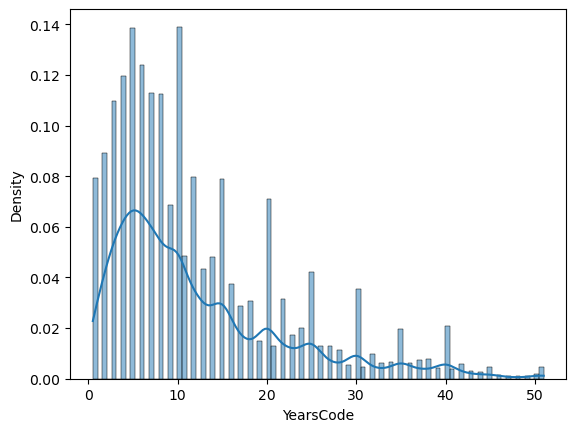

In [55]:
sns.histplot(df_so_clean["YearsCode"],kde=True, stat='density')  

The data looks to be right-skewed (long tail in the right).  Another way to check is to use a boxplot.

<Axes: xlabel='YearsCode'>

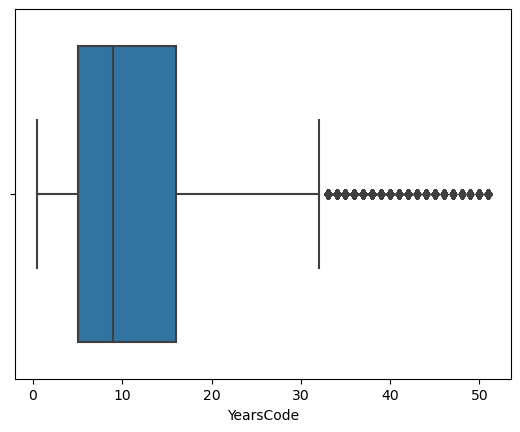

In [58]:
sns.boxplot(x=df_so_clean["YearsCode"])

So let's use the median to fill the missing values in this case.

In [60]:
df_so_clean['YearsCode']=df_stack_overflow["YearsCode"].fillna(value=df_so_clean["YearsCode"].median())

Another technique we can use is **Multivariate imputation** which is using mean or median for all samples belonging to the same class as the given object. For example, instead of choosing the mean/median of the entire `Age` column, we can use the `Hobbyist` column as well. More specifically, if the participant with the age missing was a hobbyist, we use the mean/median of the ages of the hobbyists only.  


Let's check the distribution first to see whether we'll use the mean or the median.

In [103]:
titanic_df = pd.read_csv(data_dir + 'titanic.csv')

In [104]:
titanic_df[titanic_df['Pclass'].isna() & titanic_df['Age'].isna()].shape[0]

0

In [105]:
#get number of missing values in age group by pclass, and mean age
titanic_df.groupby('Pclass')['Age'].agg(
  missing_values=lambda x: x.isnull().sum(),
  mean_age='mean'
)

,missing_values,mean_age
Pclass,,
1,30,38.233441
2,11,29.877630
3,136,25.140620


In [106]:
# we impute with mean age of each pclass
titanic_df['age_imputed'] = titanic_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

In [110]:
#or 
pclass_1_mean_age = titanic_df[titanic_df['Pclass'] == 1]['Age'].mean()
pclass_2_mean_age = titanic_df[titanic_df['Pclass'] == 2]['Age'].mean()
pclass_3_mean_age = titanic_df[titanic_df['Pclass'] == 3]['Age'].mean()

titanic_df['age_imputed'] = titanic_df['Age']
titanic_df['age_imputed'].fillna(value=titanic_df['Pclass'].map(
  {1: pclass_1_mean_age, 2: pclass_2_mean_age, 3: pclass_3_mean_age}
), inplace=True)

<Axes: xlabel='age_imputed', ylabel='Density'>

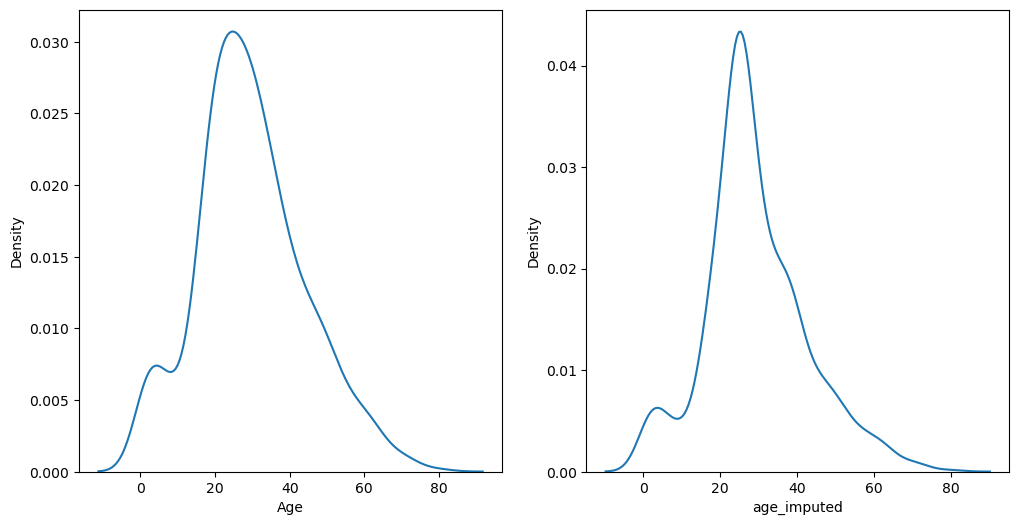

In [111]:
#plot 2 histograms to compare the original and imputed age
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.kdeplot(titanic_df["Age"], ax=ax[0])
sns.kdeplot(titanic_df["age_imputed"], ax=ax[1])

### Imputing categorical Variables - 
Now let us examine missing categorical variables and how we can deal with them. For this example we will be using the dataset `houseprice.csv`. There are many features for this dataset so we will only load the columns we are concerned with which are `BsmtQual`, `FireplaceQu`, `SalePrice`

In [112]:
# these are categorical columns and the target SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']
house_prices = pd.read_csv(data_dir + 'houseprice.csv',usecols=cols_to_use)
house_prices.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [49]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


let's inspect the percentage of missing values in each variable

In [50]:
house_prices.isnull().mean()*100

BsmtQual        2.534247
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

In [113]:
house_prices.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

For BsmtQual we will replace with mode since only small proportion is missing, whereas for fireplace we will replace with an arbitrary value since there is alot of missing values because replacing with the mode is most likely going to distort the relationship of the most frequent category with the sale price(target variable in my dataset).

### Imputing with mode

In [117]:
mode_bsmt = house_prices.BsmtQual.mode()
mode_bsmt

0    TA
dtype: object

In [118]:
mode_bsmt = house_prices.BsmtQual.mode()[0]
houses_imp = house_prices.copy()
houses_imp['BsmtQual'] = houses_imp.BsmtQual.fillna(mode_bsmt)
# check 
houses_imp.isnull().sum()['BsmtQual']

0

### Imputing with an arbitrary value

In [119]:
houses_arb = house_prices.copy()
houses_arb['FireplaceQu'] = houses_imp.FireplaceQu.fillna('Missing')
# check 
houses_arb.isnull().sum()['FireplaceQu']

0

### Other interesting techniques to impute data
- Prediction
- KNN

### Save to a csv file
Finally after cleaning our datasets we can store them as new csv files. notice here that we set the index = false when saving to new csv.

Setting index=False when saving a DataFrame to a new CSV file is important because it prevents the DataFrame's index from being saved as an additional column in the CSV. This is useful when you don't want the index to be treated as data and want the saved CSV to contain only your DataFrame's actual data, making it cleaner and more suitable for later analysis or sharing with others.

In [ ]:
df_stack_overflow.to_csv(data_dir + 'survey_results_clean.csv',index=False)